In [2]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [3]:
df = pd.read_csv('C:\\Users\\Dell\\Python Project\\Mini Project for ML/wine.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [6]:
x = df.drop(columns='quality')

In [7]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [8]:
y = df.quality

In [9]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [10]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [11]:
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1178            5.6             0.915         0.00             2.1      0.041   
1189            8.8             0.955         0.05             1.8      0.075   
161             7.6             0.680         0.02             1.3      0.072   
109             8.1             0.785         0.52             2.0      0.122   
961             7.1             0.560         0.14             1.6      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1178                 17.0                  78.0  0.99346  3.68       0.73   
1189                  5.0                  19.0  0.99616  3.30       0.44   
161                   9.0                  20.0  0.99650  3.17       1.08   
109                  37.0                 153.0  0.99690  3.21       0.69   
961                   7.0                  18.0  0.99592  3.27       0.62   

      alcohol  
1178     11.4  
1189      9.6  
161       9.2  
109       9.3  
961       9.3

In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

In [16]:
sklearn.__version__

'1.2.2'

[Text(0.5482427010297984, 0.9722222222222222, 'x[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.32182912467134095, 0.9166666666666666, 'x[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.20106403374233128, 0.8611111111111112, 'x[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.07567375109553023, 0.8055555555555556, 'x[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.05307843996494303, 0.75, 'x[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.018404907975460124, 0.6944444444444444, 'x[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.011393514460999123, 0.6388888888888888, 'x[9] <= 0.54\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007887817703768623, 0.5833333333333334, 'x[9] <= 0.48\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.004382120

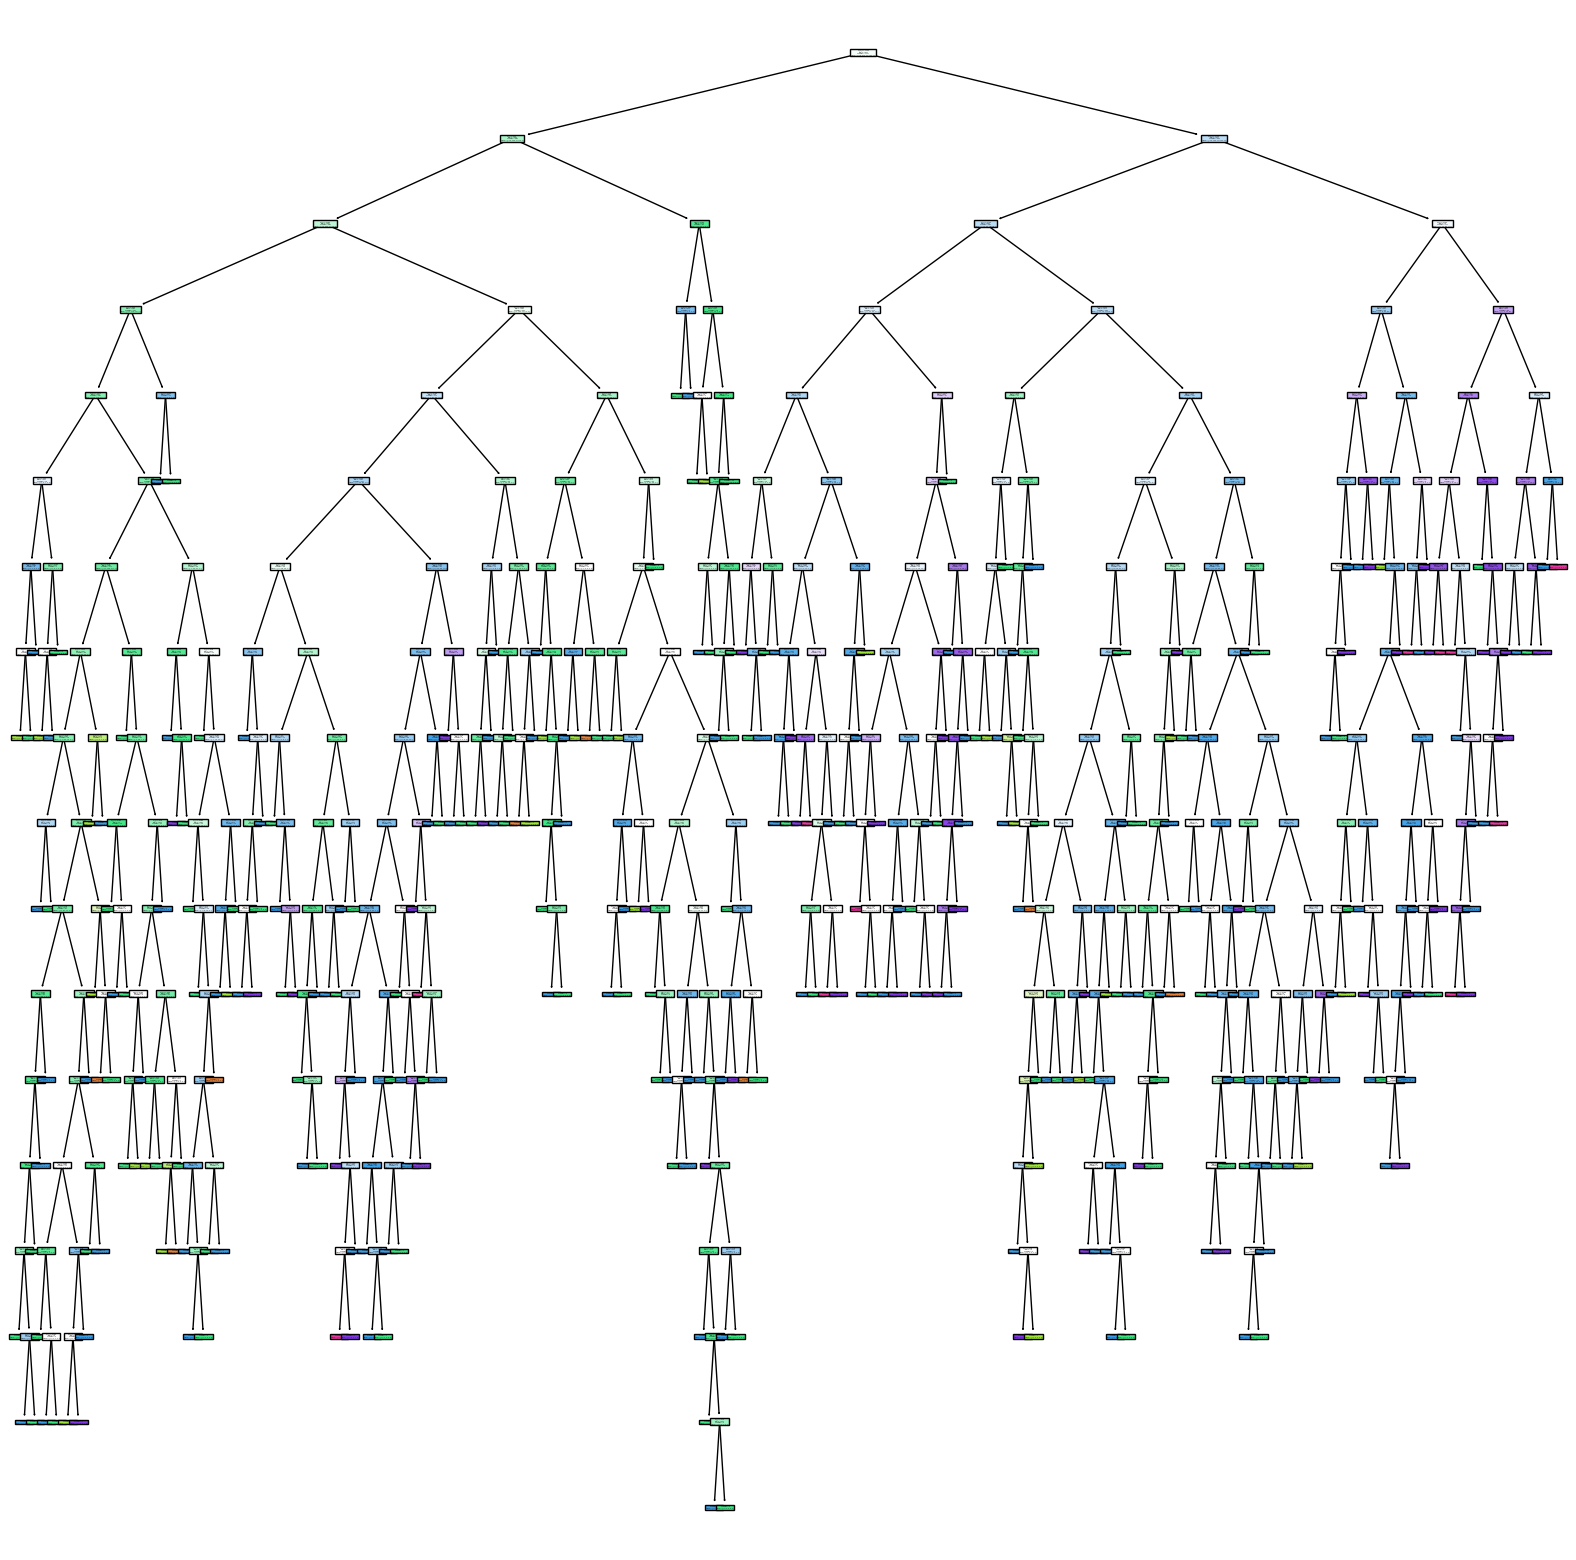

In [17]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [18]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [29]:
df1 = df.head(30)
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   
20            8.9             0.220         0.48             1.8      0.077   
21            7.6             0.390         0.31             2.3      0.082   
22            7.9             0.430         0.21             1.6      0.106   
23            8.5             0.490         0.11             2.3      0.084   
24            6.9             0.400         0.14             2.4      0.085   
25            6.3             0.390         0.16             1.4      0.080   
26            7.6             0.410         0.24             1.8      0.080   
27            7.9             0.430         0.21             1.6      0.106   
28            7.1             0.710         0.00             1.9      0.080   
29            7.8             0.645         0.00             2.0      0.082   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969

In [30]:
x1 = df1.drop(columns = 'quality')

In [31]:
y1 = df1.quality

In [32]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

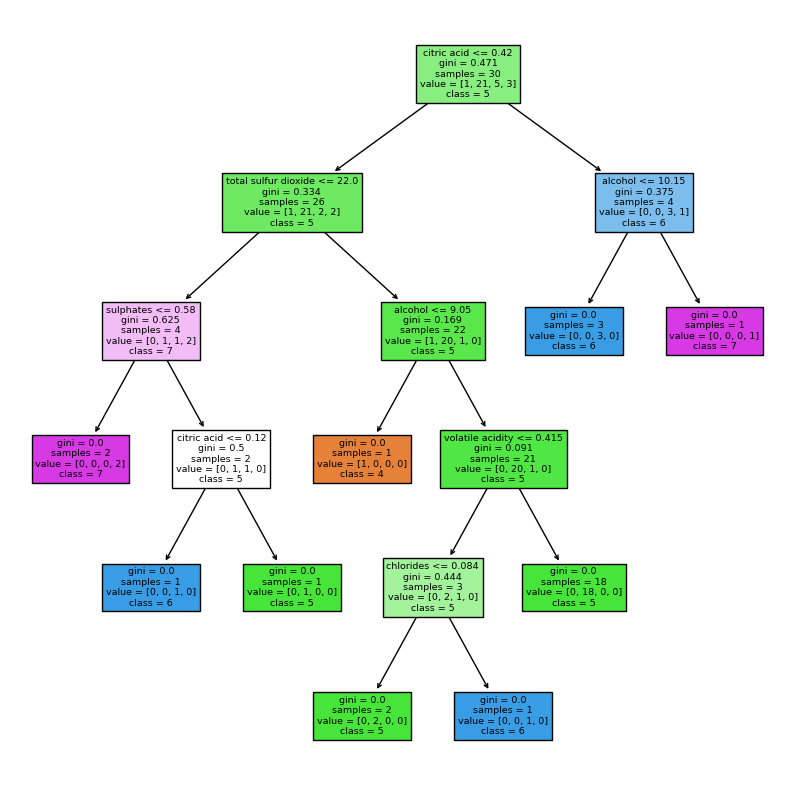

In [33]:
plt.figure(figsize = (10,10))
tree.plot_tree(dt_model1,filled=True, class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_1')